# Late Procurement Deliveries – Notebook Workflow

## 1. Import Libraries and Set Variables
- Import `pandas`, `matplotlib`, and `scikit-learn` for data handling, visualization, and machine learning.
- Set Variables for repreducability

## 2. Read Data
- Load Excel files for customers, suppliers, materials, warehouses, and procurement transactions.
- Combine two transaction parts into a single DataFrame using a merge on the `id` column.

## 3. Data Preparation
- Create a new column `late` to indicate if a delivery was late (`requested_date < received_date`).
- Define features for modeling: `quantity` and `price`.
- Drop rows with missing values in these features.

## 4. Decision Tree Modeling
- Initialize a `DecisionTreeClassifier` with a maximum depth of 3.
- Fit the model to the data using the selected features.
- Compute the confusion matrix and scores

## 5. Random Forest Modeling
- Initialize a `RandomForestClassifier` with a maximum depth of 3 and 100 trees.
- Fit the model to the data using the selected features.
- Compute the confusion matrix and scores

## 6. Gradient Boosted Trees Modeling
- Initialize a `GradientBoostingClassifier` with a maximum depth of 3 and 100 trees.
- Fit the model to the data using the selected features.
- Compute the confusion matrix and scores


<br><br>

## 1. Import Libraries

In [8]:
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import (accuracy_score, precision_score, recall_score,                              
                             f1_score,
                             confusion_matrix, ConfusionMatrixDisplay)


Get the current working directory

In [9]:
os.getcwd()

'/Users/jan/Documents/02_teaching/fau/course_business_analytics_students/teaching_cases/case_3_predicting_late_purchase_orders'

Set variables


In [3]:
random_var=2025

## 2. Read Data

Define a variable to where files are saved on the pc

<h4><span style="color: red;">This needs very like to be adjusted!!!!</span></h4>

In [10]:
path_to_files = '../case_2_bi_report/data'

Get supplier data

In [11]:
supplier = pd.read_excel(f'{path_to_files}/supplier.xlsx')

Get the column names

In [ ]:
supplier.columns

Index(['id', 'name', 'group', 'country', 'street', 'house_number', 'city',
       'postal_code', 'email'],
      dtype='object')

Show the first rows of data

In [ ]:
supplier.head()

,id,name,group,country,street,house_number,city,postal_code,email
0,1,Beans Inc.,raw material,Mexico,Broadway Ave,150,New York,10012,info@beansinc.com
1,2,Aromatico,raw material,Italy,Kaffeegasse,27,Bremen,28195,kontakt@aromatico.de
2,3,Farmers of Brazil,raw material,Brazil,Rua do Cafe,72,Sao Paulo,04567-000,contact@farmersofbrazil.br
3,4,Fair Trade AG,raw material,Panama,Friedensstra√üe,10,Zuerich,8001,service@fairtradeag.ch
4,5,Handelskontor Hamburg,raw material,Germany,Speicherstra√üe,3,Hamburg,20457,info@handelskontor.de


Add a suffix to remember from excel file data was read

In [ ]:
supplier = pd.read_excel(f'{path_to_files}/supplier.xlsx').add_prefix('supplier_')

Get material data

In [ ]:
material = pd.read_excel(f'{path_to_files}/material.xlsx').add_prefix('material_')

Get warehouse data

In [ ]:
warehouse = pd.read_excel(f'{path_to_files}/warehouse.xlsx').add_prefix('warehouse_')

Get transaction data

In [ ]:
transactions_part_a = pd.read_excel(f'{path_to_files}/procurement_transactions_part_A.xlsx')

In [ ]:
transactions_part_b = pd.read_excel(f'{path_to_files}/procurement_transactions_part_B.xlsx')

Check output for transactions part_a

In [ ]:
transactions_part_a.head()

,supplier_code,material_code,warehouse_code,logistic_partner_code,id
0,14,c_2,2,6,c9e0d7a4-bbb6-400c-b2b2-4ea3ba04060f
1,14,c_2,7,6,cc543547-3253-4ce0-bf8b-247baf882c0a
2,10,c_1,4,6,6283fc26-1d28-4b95-976a-eec6e83c42b5
3,4,c_0,6,6,a7351547-34e6-4c5c-89c8-0062d94f8d3e
4,4,c_0,3,6,e35b104e-a41c-4712-9753-317e18f5c584


## 3. Data Preparation

### Combine transactions together
use a Left-Join to combine both dataframes via the column ID

In [ ]:
transactions = pd.merge(transactions_part_a, transactions_part_b, on='id')

In [ ]:
transactions.head()

,supplier_code,material_code,warehouse_code,logistic_partner_code,id,order_date,requested_date,received_date,quantity,price
0,14,c_2,2,6,c9e0d7a4-bbb6-400c-b2b2-4ea3ba04060f,2019-06-06,2019-06-16,2019-06-12 02:00:00,750,3.886901
1,14,c_2,7,6,cc543547-3253-4ce0-bf8b-247baf882c0a,2022-12-28,2023-01-09,2023-01-05 00:00:00,750,6.433883
2,10,c_1,4,6,6283fc26-1d28-4b95-976a-eec6e83c42b5,2019-09-08,2019-09-27,2019-09-25 03:00:00,250,4.848504
3,4,c_0,6,6,a7351547-34e6-4c5c-89c8-0062d94f8d3e,2022-03-30,2022-04-17,2022-04-11 02:00:00,500,56.026029
4,4,c_0,3,6,e35b104e-a41c-4712-9753-317e18f5c584,2019-03-30,2019-04-18,2019-04-14 04:00:00,250,23.635190


### Add Supplier Info

In [ ]:
transactions = pd.merge(transactions, supplier, left_on='supplier_code', right_on='supplier_id', how='left')

In [ ]:
transactions.columns

Index(['supplier_code', 'material_code', 'warehouse_code',
       'logistic_partner_code', 'id', 'order_date', 'requested_date',
       'received_date', 'quantity', 'price', 'supplier_id', 'supplier_name',
       'supplier_group', 'supplier_country', 'supplier_street',
       'supplier_house_number', 'supplier_city', 'supplier_postal_code',
       'supplier_email'],
      dtype='object')

### Calculate whether a delivery was late

In [ ]:
transactions['late'] = transactions['requested_date'] < transactions['received_date']

#### Check Supplier

In [ ]:
transactions.groupby('supplier_name')['late'].mean().sort_values(ascending=False)

supplier_name
The Bean Curators           0.993103
Origin Lineage Trading      0.933121
Green Bean Collective       0.736156
RoastWorks Supply Co.       0.582857
Equator Supply Network      0.578947
Humble Roots Trading Co.    0.568254
Farmers of Brazil           0.564470
Small Batch Supply          0.557632
Handelskontor Hamburg       0.361971
Aromatico                   0.356507
Craft Roast Co-Op           0.350678
Beans Inc.                  0.350027
Grindline Partners          0.349147
TerraBean Source Co.        0.348135
Fair Trade AG               0.340690
Name: late, dtype: float64

#### Define the features (x-Variables)

In [ ]:
features = ['quantity', 'price']

#### Clean Data for missing values

In [ ]:
transactions = transactions.dropna(subset=features)

### 4. Decision Tree Modeling

#### Initialize a decision tree with a maximum of 3-levels

In [ ]:
tree = DecisionTreeClassifier(max_depth=3, random_state=random_var)


#### 
Fit tree on the data

In [ ]:
tree.fit(X=transactions[features], y=transactions['late'])

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,2025
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Visualize the decision tree


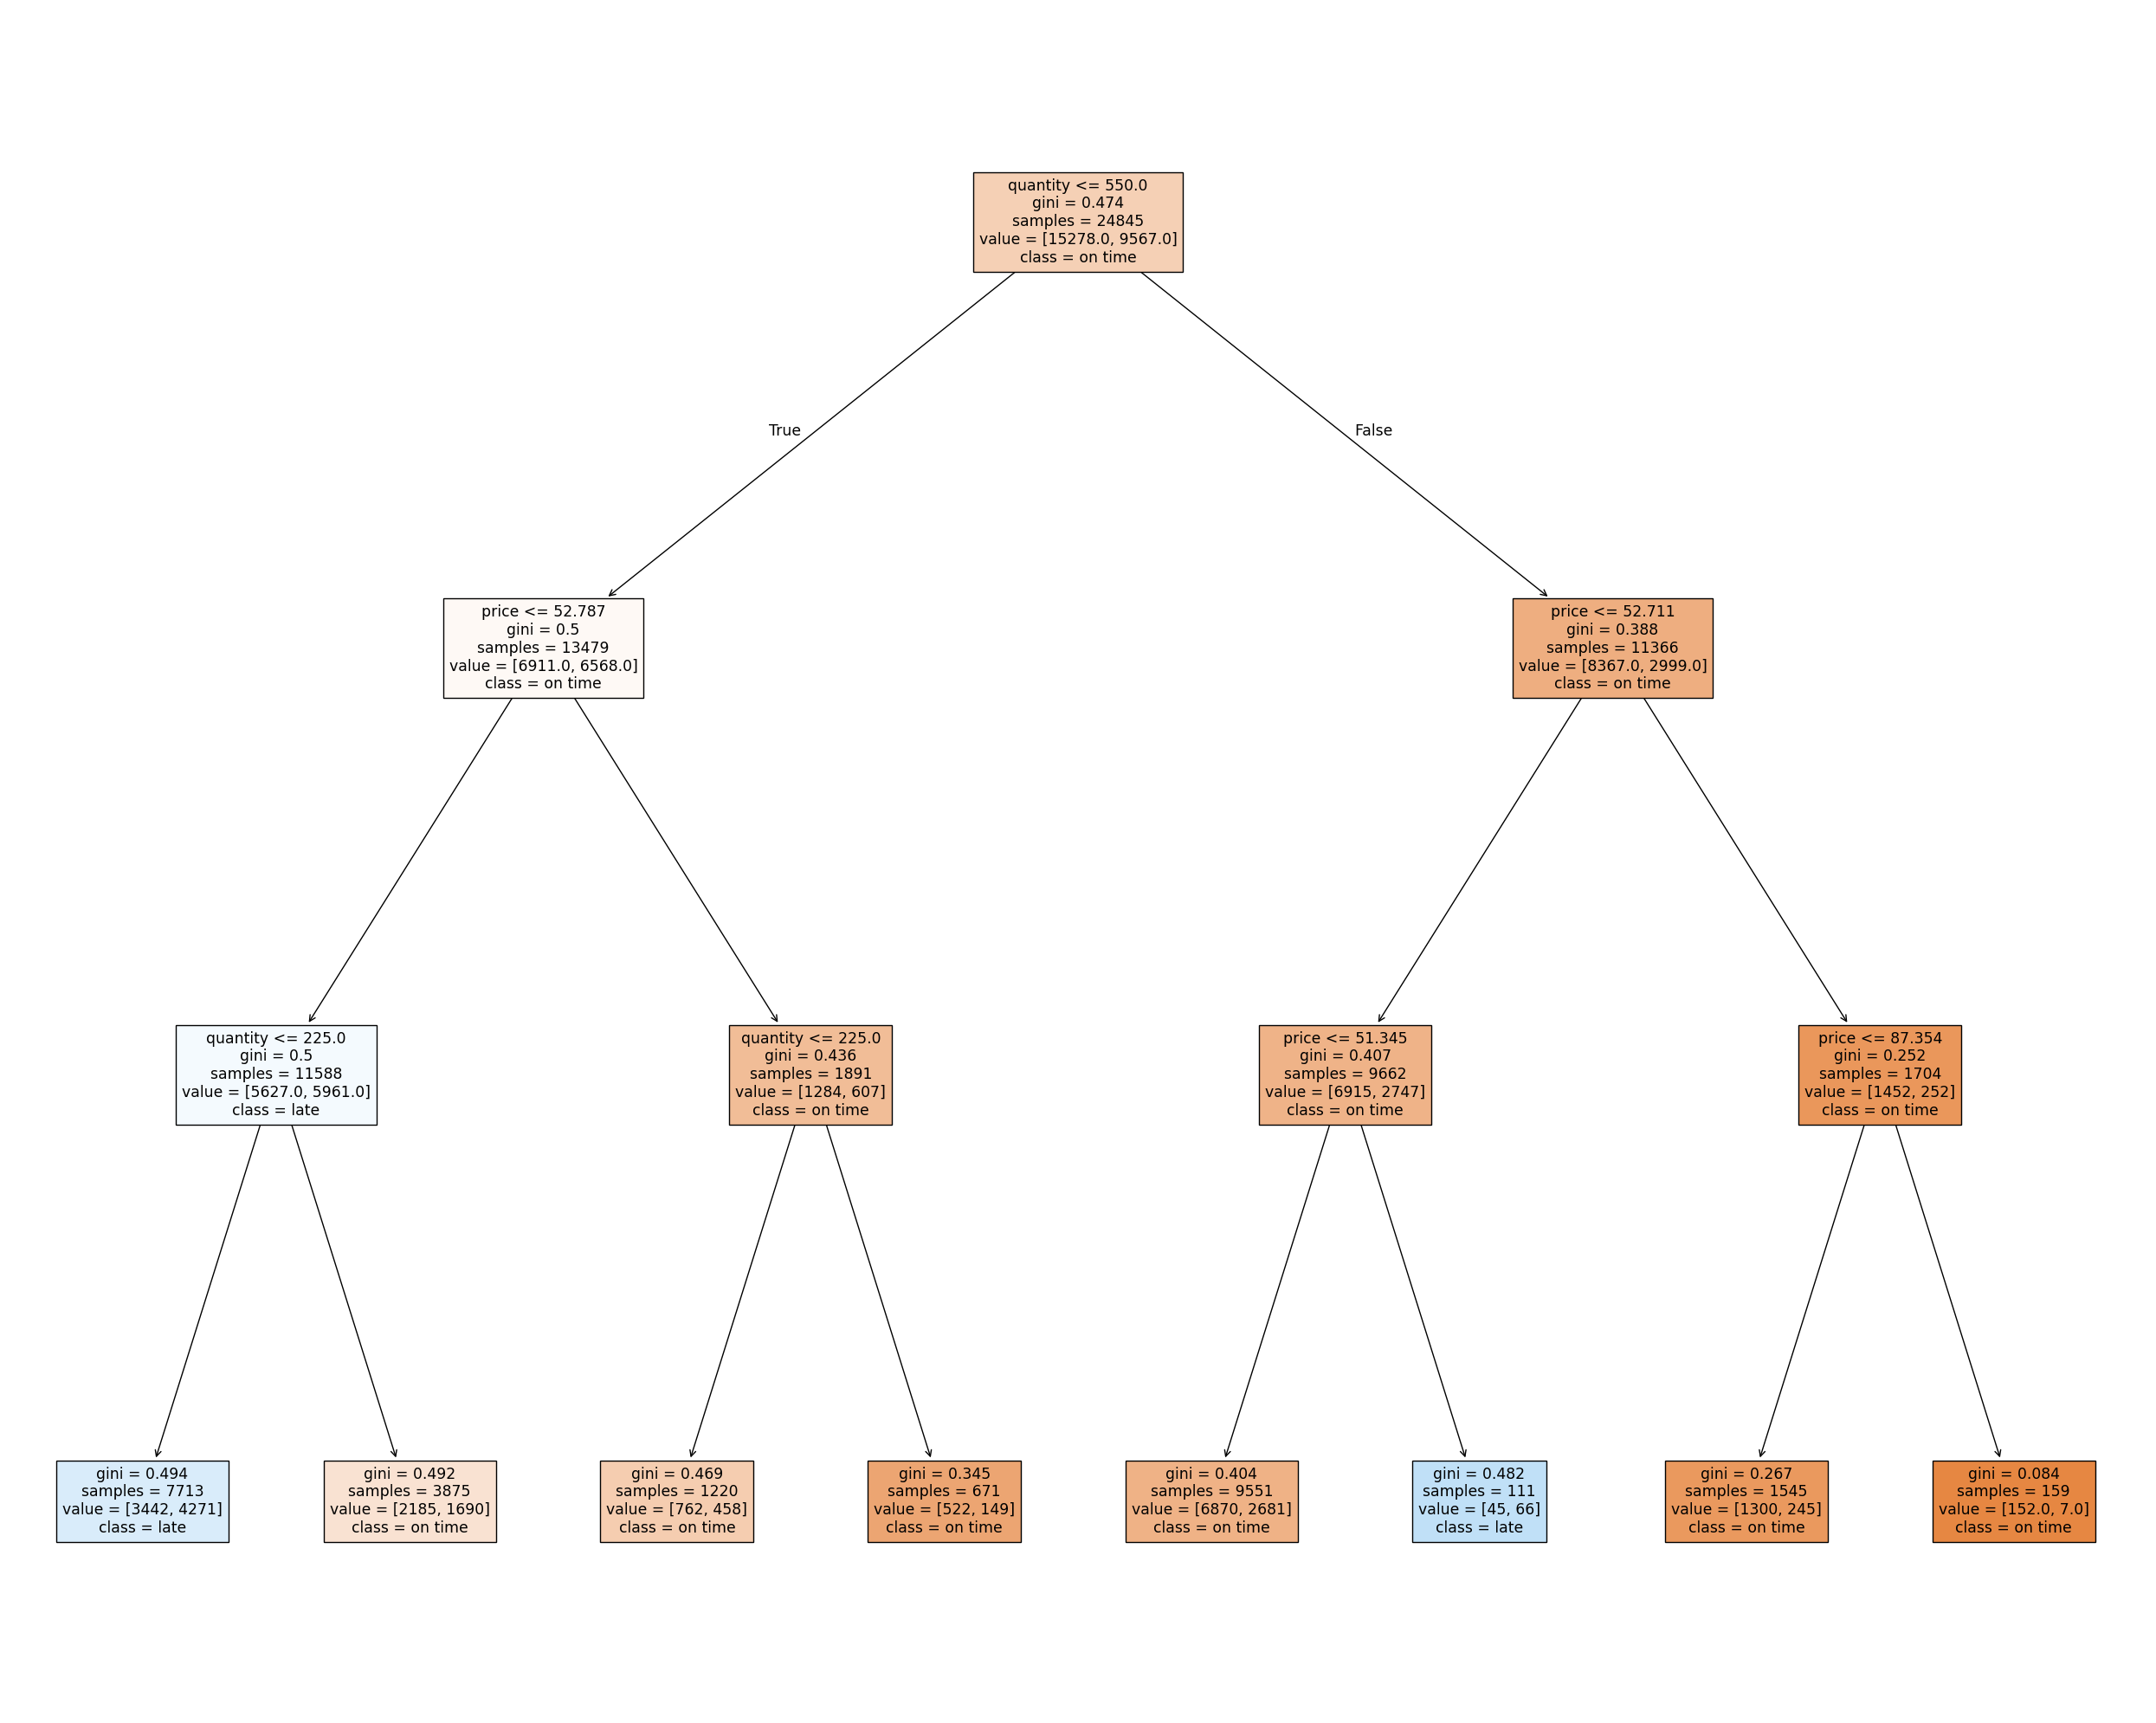

In [ ]:
plt.figure(figsize=(25, 20))
plot_tree(
        tree, feature_names=features, 
        class_names=['on time', 'late'], 
        filled=True
        )
plt.tight_layout()
plt.savefig('decision_tree_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. Model Evaluation

### Get Accuracy of the decision tree

In [ ]:
# First calculate predictions
y_pred = tree.predict(transactions[features])
y_true = transactions['late']


get the confusion matrix

In [ ]:
cm = confusion_matrix(y_true, y_pred)

Transpose the confusion matrix to invert the axes (same order as in lecture notes)

In [ ]:
cm_transposed = cm.T

Display the confusion matrix

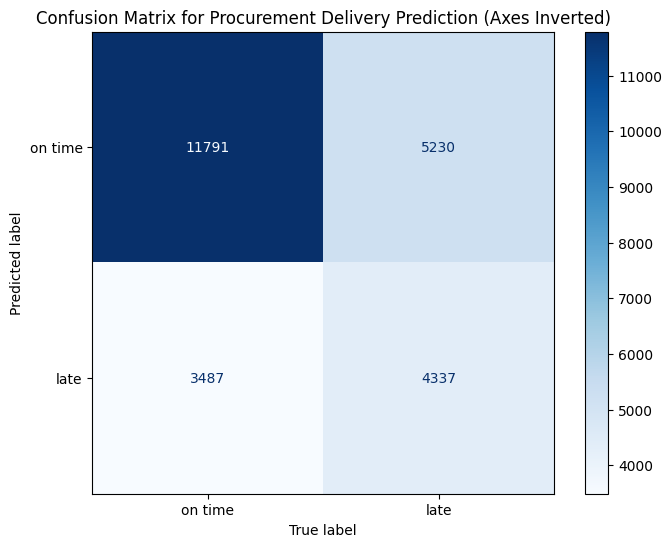

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_transposed, 
                             display_labels=['on time', 'late'])

# Create a figure and plot
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')
plt.xlabel('True label')  # This will now be on the x-axis
plt.ylabel('Predicted label')  # This will now be on the y-axis
plt.title('Confusion Matrix for Procurement Delivery Prediction (Axes Inverted)')
plt.show()

Accuracy: What percentage of the model's predictions were correct?

In [ ]:
accuracy_score(y_true=y_true, y_pred=y_pred)

0.6491446971221574

Precision: Out of all the positive predictions (delivery is late), how many were actually correct?


In [ ]:
precision_score(y_true=y_true, y_pred=y_pred)

0.5543200408997955

Recall: Of all the actual positive instances, how many did the model correctly identify? 


In [ ]:
recall_score(y_true=y_true, y_pred=y_pred)

0.4533291522943452

Calculate Specificity: Of all the actual negative instances (delivery is on time), how many did the model correctly identify?


In [ ]:
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)


In [ ]:
specificity

np.float64(0.7717633198062573)

Beautified Output

In [ ]:
print(f"Specificity: {specificity:.2f}")

Specificity: 0.77


F-1 Score

In [ ]:
f1_score(y_true=y_true, y_pred=y_pred)

0.4987637283652464

## 5. Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=random_var)

In [ ]:
rf.fit(X=transactions[features], y=transactions['late'])

,n_estimators,100
,criterion,'gini'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False



Plot the first 3 trees in the random forest

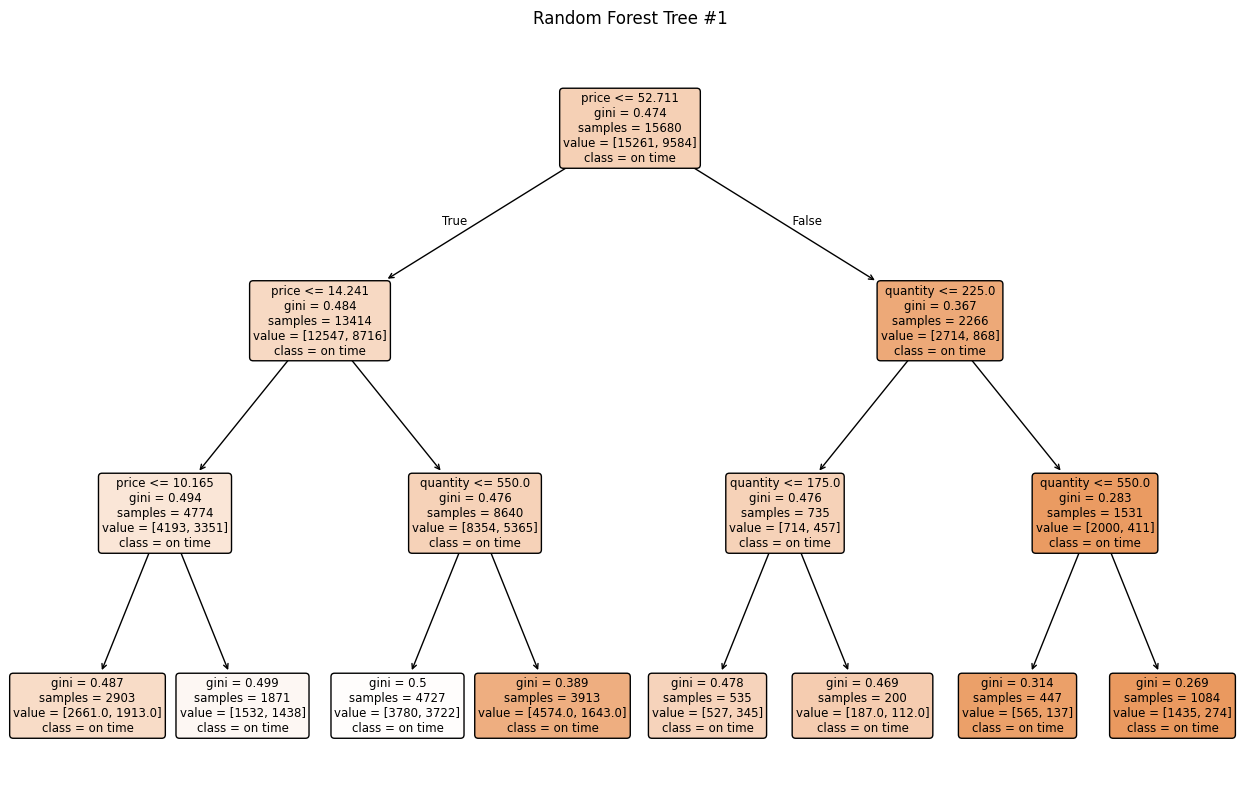

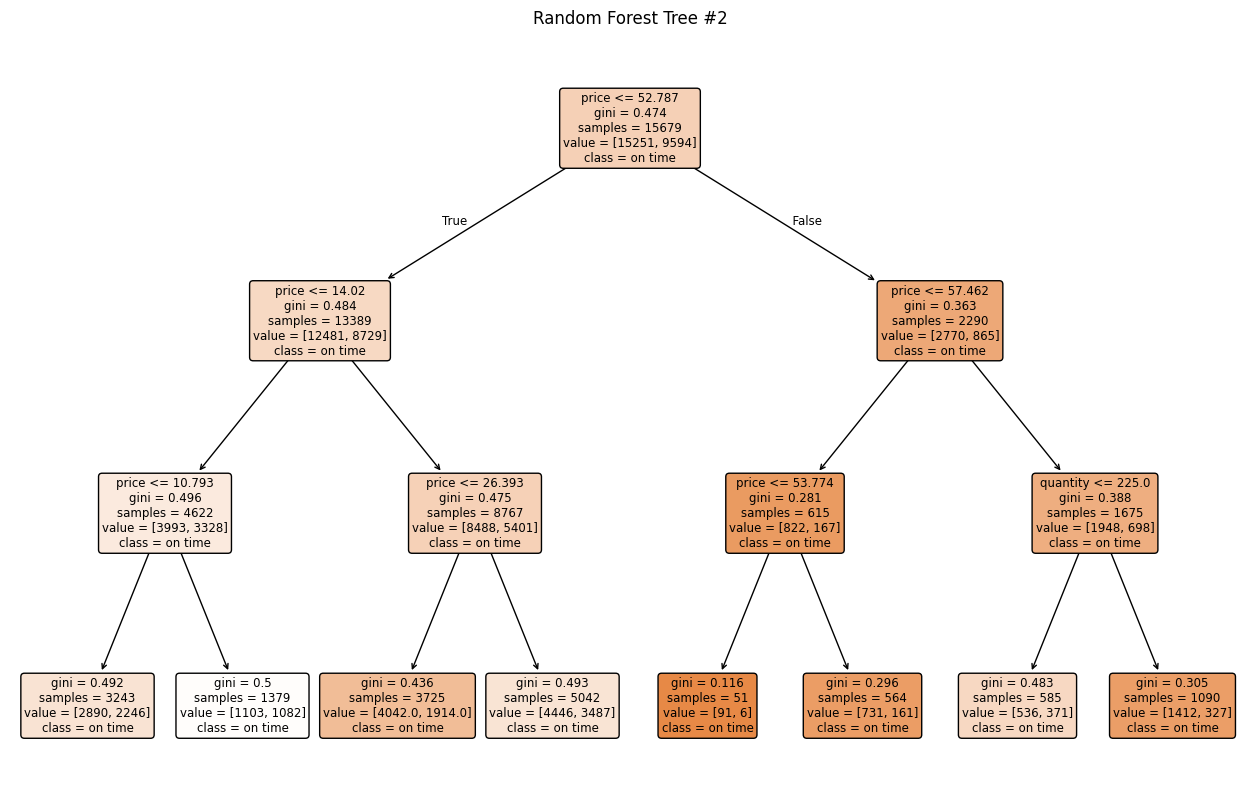

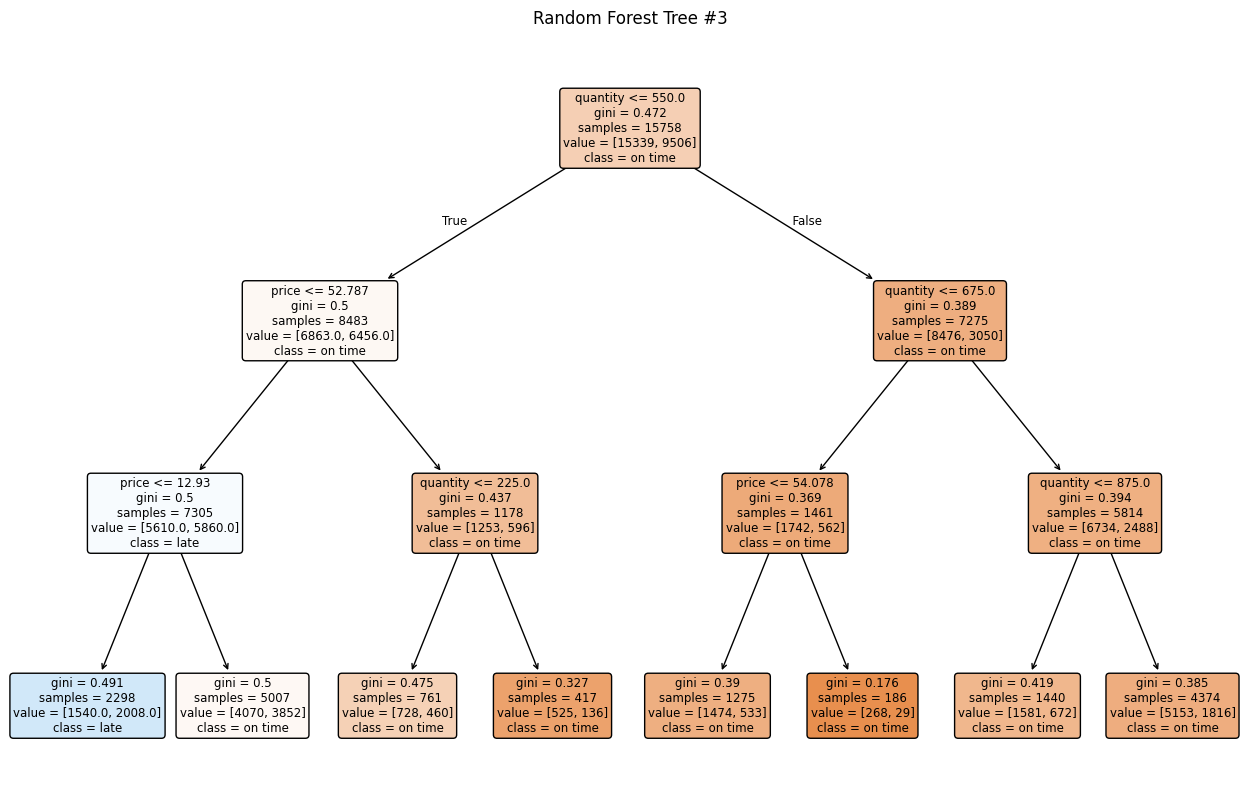

In [ ]:

for i in range(3):
    plt.figure(figsize=(16, 10))
    plot_tree(
        rf.estimators_[i],
        feature_names=features,
        class_names=['on time', 'late'],
        filled=True,
        rounded=True,
        max_depth=3  # Optional: limit depth for readability
    )
    plt.title(f"Random Forest Tree #{i+1}")
    plt.show()

In [ ]:
rf_pred = rf.predict(transactions[features])

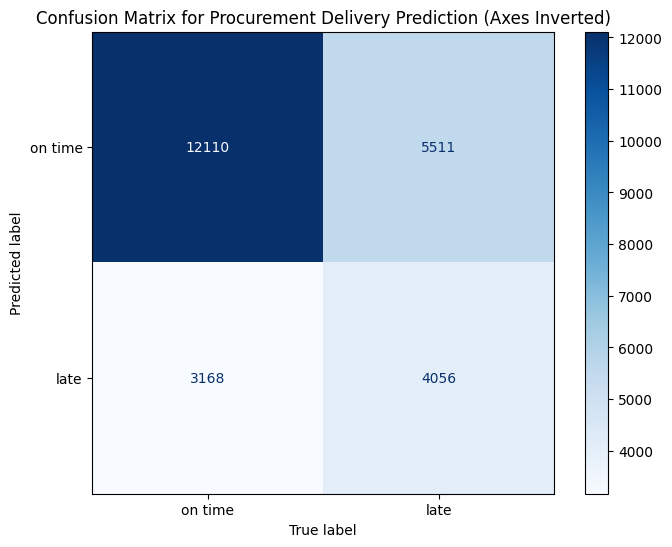

In [ ]:
cm = confusion_matrix(y_true, rf_pred)
cm_transposed = cm.T
disp = ConfusionMatrixDisplay(confusion_matrix=cm_transposed, 
                             display_labels=['on time', 'late'])

# Create a figure and plot
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')
plt.xlabel('True label')  # This will now be on the x-axis
plt.ylabel('Predicted label')  # This will now be on the y-axis
plt.title('Confusion Matrix for Procurement Delivery Prediction (Axes Inverted)')
plt.show()

In [ ]:
accuracy_score(y_true=y_true, y_pred=rf_pred)

0.6506741799154759

In [ ]:
precision_score(y_true=y_true, y_pred=rf_pred)

0.5614617940199336

In [ ]:
recall_score(y_true=y_true, y_pred=rf_pred)

0.4239573534023205

## 6. Gradient Boosted Trees

In [ ]:
gbm = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=random_var)

In [ ]:
gbm.fit(X=transactions[features], y=transactions['late'])

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [ ]:
gbm_pred = gbm.predict(transactions[features])

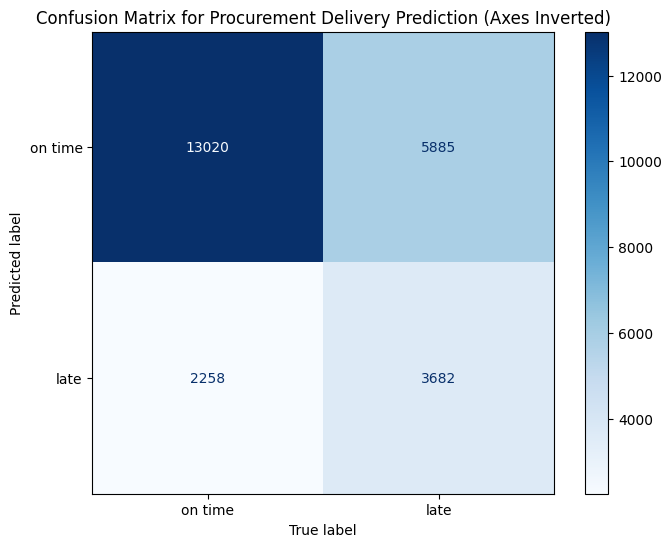

In [ ]:
cm = confusion_matrix(y_true, gbm_pred)
cm_transposed = cm.T
disp = ConfusionMatrixDisplay(confusion_matrix=cm_transposed, 
                             display_labels=['on time', 'late'])

# Create a figure and plot
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')
plt.xlabel('True label')  # This will now be on the x-axis
plt.ylabel('Predicted label')  # This will now be on the y-axis
plt.title('Confusion Matrix for Procurement Delivery Prediction (Axes Inverted)')
plt.show()

In [ ]:
accuracy_score(y_true=y_true, y_pred=gbm_pred)


0.6722479372107064

In [ ]:
precision_score(y_true=y_true, y_pred=gbm_pred)

0.6198653198653199

In [ ]:
recall_score(y_true=y_true, y_pred=gbm_pred)

0.3848646388627574